# Generate Actor Dataframes
This code will load the actors list from the wikipedia scraper JSON file, create a dataframe with them. Then we create a second dataframe from the CSV file of black actors, also from wikipedia, and we use regex to remove some of the elements that this one has that are irrelevant and must be removed to compare both dataframes. Lastly we do the comparison, giving a table with the actors name, and a 0 if they are no black, a 1 if they are

In [1]:
import pandas as pd
import json
from pandas import json_normalize
import os
import regex as re
import matplotlib.pyplot as plt

# Or relative path, does not work sometimes, just uncomment it and comment the complete pathone
# actor_df = pd.read_json('data\metadata\movies_metadata.json', encoding='latin-1')
df = pd.read_json('D:\ITU\DataintheWild\Project\DITW_project-master\data\metadata\movies_metadata.json', 
                    encoding='latin-1')

# create a actor dataframe consisting of the json information plus each movie they appear
actor_df = (df[df.index.isin( ['actors','title'])]
            .T
            .explode('actors')
            .reset_index())

actor_df.head

<bound method NDFrame.head of      index                                title          actors
0        1               Exodus: Gods and Kings  Christian Bale
1        1               Exodus: Gods and Kings   Joel Edgerton
2        1               Exodus: Gods and Kings   John Turturro
3        1               Exodus: Gods and Kings      Aaron Paul
4        1               Exodus: Gods and Kings  Ben Mendelsohn
..     ...                                  ...             ...
115     13  The Wolf of Wall Street (2013 film)   Kyle Chandler
116     13  The Wolf of Wall Street (2013 film)      Rob Reiner
117     13  The Wolf of Wall Street (2013 film)     Jon Favreau
118     13  The Wolf of Wall Street (2013 film)   Jean Dujardin
119     13  The Wolf of Wall Street (2013 film)        Aya Cash

[120 rows x 3 columns]>

In [2]:
# Create second dataframe, with actors that are not white
# relative path, comment the other one if wish to change
#black_actor_path = 'data/actors.csv' 
black_actor_path = 'D:/ITU/DataintheWild/Project/DITW_project-master/data/actors.csv'

black_actor_df = pd.read_csv(black_actor_path, on_bad_lines='skip', encoding="utf-8")

# Remove special characters from the dataframe so we only have the actors names, as it appears
# on the other dataframe, otherwise the strings will be different and we wont be able to tell
# which are which
black_actor_df['actor_id'] = black_actor_df['actor_id'].str.split(' ').str[:2].str.join(' ')
black_actor_df['actor_id'] = black_actor_df['actor_id'].str.extract('(^[^\(|^\-]+)')

black_actor_df.head()

,actor_id
0,Ernest Hogan
1,Matilda Sissieretta
2,George H.
3,Bob Cole
4,Madame Sul


In [3]:
# See if the actors from one dataframe appear in the other, if they do add a 1 to the column on the 
# right. This column is changed, as well as the title column, to better match their descriptions
#labeled_actor_df = actor_df.assign(indf=actor_df['actors'].isin(black_actor_df['actor_id'].str.extract(
#                    '(.*)(?=\s[-–])', expand=False)).astype(int))

labeled_actor = actor_df.assign(indf=actor_df['actors'].isin(black_actor_df['actor_id']).astype(int))

# Change name of column
labeled_actor = labeled_actor.rename(columns = {'title': 'movie_title', 'indf': 'not_white'})
labeled_actor.head(50)


,index,movie_title,actors,not_white
0,1,Exodus: Gods and Kings,Christian Bale,0
1,1,Exodus: Gods and Kings,Joel Edgerton,0
2,1,Exodus: Gods and Kings,John Turturro,0
3,1,Exodus: Gods and Kings,Aaron Paul,0
4,1,Exodus: Gods and Kings,Ben Mendelsohn,0
5,1,Exodus: Gods and Kings,Sigourney Weaver,0
6,1,Exodus: Gods and Kings,Ben Kingsley,0
7,2,The Little Mermaid (2023 film),Halle Bailey,1
8,2,The Little Mermaid (2023 film),Jonah Hauer-King,0
9,2,The Little Mermaid (2023 film),Daveed Diggs,1


In [4]:
# Save dataframe as csv file
labeled_actor.to_csv('D:/ITU/DataintheWild/Project/DITW_project-master/data/actor_race.csv') 



<AxesSubplot:xlabel='movie_title'>

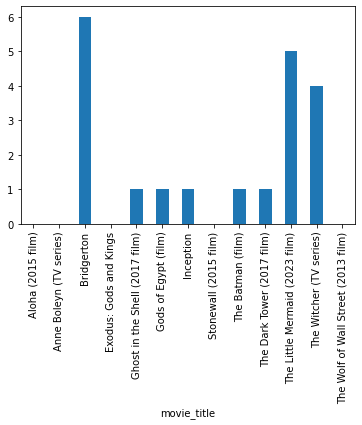

In [7]:
# Display amount of actors that are not white per movie
labeled_actor.groupby('movie_title')['not_white'].sum().plot.bar()



In [ ]:
# Halle Bailey, Daveed Diggs, Awkwafina, Art Malik, Noma Dumezweni, Takeshi Kitano, Zoe Kravitz
# Jeffrey Wright, Anya Chalotra, Mimi Ndiweni, Anna Shaffer, Idris Elba, Adjoa Andoh, Ruby Barker,
# Regé-Jean Page, Simone Ashley, Charithra Chandran, Shelley Conn, Martins Imhangbe, Ken Watanabe